#### Import Libraries

In [1]:
import numpy as np# numpy
import pandas as pd# pandas
import matplotlib.pyplot as plt# matplotlib
import seaborn as sns; sns.set # seaborn

In [2]:
sns.set()# Seaborn Styles?

#### Import Data

In [40]:
usa = pd.read_csv('../data/census_2015/acs2015_county_data.csv') # read usa data 
usa

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
5,1011,Alabama,Bullock,10678,5660,5018,4.4,22.2,70.7,1.2,...,5.0,1.7,2.8,27.5,3865,79.5,15.1,5.4,0.0,18.0
6,1013,Alabama,Butler,20354,9502,10852,1.2,53.3,43.8,0.1,...,0.8,0.6,1.7,24.6,7813,77.4,16.2,6.2,0.2,10.9
7,1015,Alabama,Calhoun,116648,56274,60374,3.5,73.0,20.3,0.2,...,1.2,1.2,2.7,24.1,47401,74.1,20.8,5.0,0.1,12.3
8,1017,Alabama,Chambers,34079,16258,17821,0.4,57.3,40.3,0.2,...,0.3,0.4,2.1,25.1,13689,85.1,12.1,2.8,0.0,8.9
9,1019,Alabama,Cherokee,26008,12975,13033,1.5,91.7,4.8,0.6,...,0.6,0.7,2.5,27.4,10155,73.1,18.5,7.9,0.5,7.9


In [14]:
# Pick a state to filter your dataframe by, save it to a new state_df.
ca = usa[usa["State"] == "California"]

##### Run a .info() to look at the columns that you can compare

In [15]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 186 to 243
Data columns (total 37 columns):
CensusId           58 non-null int64
State              58 non-null object
County             58 non-null object
TotalPop           58 non-null int64
Men                58 non-null int64
Women              58 non-null int64
Hispanic           58 non-null float64
White              58 non-null float64
Black              58 non-null float64
Native             58 non-null float64
Asian              58 non-null float64
Pacific            58 non-null float64
Citizen            58 non-null int64
Income             58 non-null float64
IncomeErr          58 non-null float64
IncomePerCap       58 non-null int64
IncomePerCapErr    58 non-null int64
Poverty            58 non-null float64
ChildPoverty       58 non-null float64
Professional       58 non-null float64
Service            58 non-null float64
Office             58 non-null float64
Construction       58 non-null float64
Production   

<br>

In [22]:
feat1 = "Income"
feat2 = "Unemployment"

### Scatter Plots

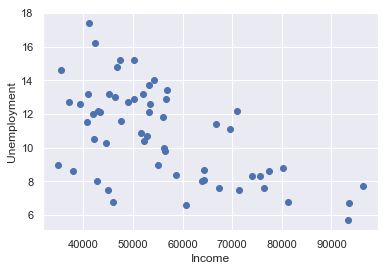

In [23]:
# Pick two columns out of this new state_df 
# and examine potential correlations!



_ = plt.scatter(feat1, feat2, data=ca)
_ = plt.xlabel(feat1)
_ = plt.ylabel(feat2)

<br>

### Covariance

In [27]:
# use np.cov() to create a covariance matrix, 
# are you sure you know what this is saying?
np.cov(ca[feat1], ca[feat2])

print("Variance for feat1:", np.cov(ca[feat1], ca[feat2])[0,0])
print("Variance for feat2:", np.cov(ca[feat1], ca[feat2])[1,1])
print("Covariance for these two features", np.cov(ca[feat1], ca[feat2])[0,1])

Variance for feat1: 226537684.09830615
Variance for feat2: 7.641052631578948
Covariance for these two features -24303.926315789464


<br>

### Pearson Correlation Coefficient

In [30]:
def pearson_coeff(x,y):
    covar = np.cov(x, y)[0,1]
    std_x = np.std(x)
    std_y = np.std(y)

    return covar / (std_x * std_y)

In [31]:
# Use the pearson_coeff function to determine 
# how the two features correlate
pearson_coeff(ca[feat1], ca[feat2])

-0.5944054106243885

### Do you remember how the Pearson Correlation Coefficient works?
### How does it relate to the covariance...look at the function def!

The Pearson correlation coefficent describes a correlation and bounds it between -1 and 1. 

Covariance is bounded by -infinity and infinity

<br>

### Repeat the previous to find a total of 3 examples for the 3 differtent types of correlations that the Pearson Correlation Coefficient describes!

#### The different types are listed below... Go ahead and count your first set of numerical columns to whichever category of the 3 it ends up falling under.

In [57]:
def overview(feat1, feat2, df):
    # b. Plot Scatter
    fig = plt.figure()
    ax = plt.gca()
    plt.scatter(feat1, feat2, data=df)
    ax.set_xlabel(feat1)
    ax.set_ylabel(feat2)
    plt.show()
    

    # c. Caluculate Covariance
    print("Covariance:",np.cov(df[feat1], df[feat2])[0,1])

    # d. Calculate Pearson Coeff
    print("Pearson correlation coefficent:", pearson_coeff(df[feat1], df[feat2]))

In [ ]:
overview("Home", "")

#### 1. Negative Correlation

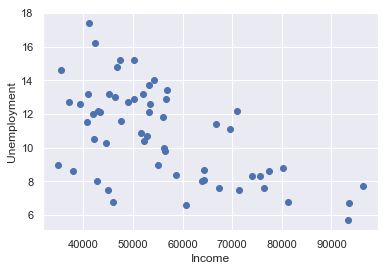

Covariance: -24303.926315789464
Pearson correlation coefficent: -0.5944054106243885


In [56]:
# a. Pick new pair of numerical features
feat1 = "Income"
feat2 = "Unemployment"
overview(feat1, feat2, df=ca)

# e. Is it what you expected?
# Yes, if a family has a higher income, the unemployment rate should be low, vice versa. 

#### 2. No Correlation

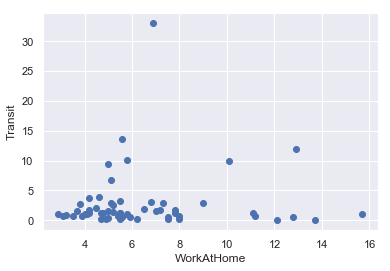

Covariance: 0.8676073805202658
Pearson correlation coefficent: 0.06183804100723334


In [42]:
# a. Pick new pair of numerical features
feat1 = "WorkAtHome"
feat2 = "Transit"
overview(feat1, feat2, df=ca)

# e. Is it what you expected?
# Yes, if people work at home they shouldn't be using transit

#### 3. Positive Correlation

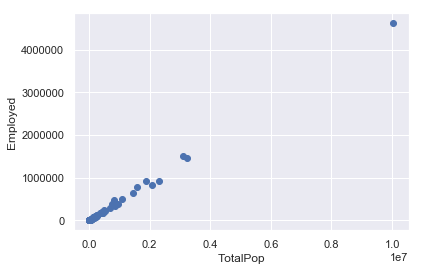

Covariance: 974454889604.1041
Pearson correlation coefficent: 1.0160563577577901


In [55]:
# a. Pick new pair of numerical features
# feat1 = "Income"
# feat2 = "IncomePerCap"
feat1 = "TotalPop"
feat2 = "Employed"
overview(feat1, feat2, df=ca)

# e. Is it what you expected?
# Yes, If an individual has a good income then the family income should also be relatively positive, vice versa

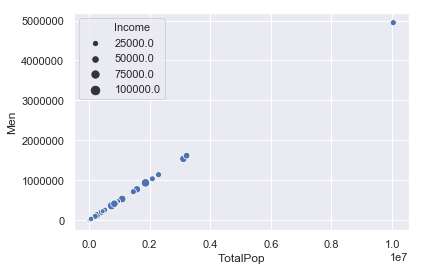

In [59]:
x="TotalPop"
y="Men"
z="Income"
sns.scatterplot(ca[x],ca[y], size=ca[z])
plt.show()

In [68]:
ca.loc[ca['Women'] == True,"Most_Common_Gender"] = "Female"
ca.loc[ca['Men'] == False,"Most_Common_Gender"] = "Male"
ca["Most_Common_Gender"]

186    NaN
187    NaN
188    NaN
189    NaN
190    NaN
191    NaN
192    NaN
193    NaN
194    NaN
195    NaN
196    NaN
197    NaN
198    NaN
199    NaN
200    NaN
201    NaN
202    NaN
203    NaN
204    NaN
205    NaN
206    NaN
207    NaN
208    NaN
209    NaN
210    NaN
211    NaN
212    NaN
213    NaN
214    NaN
215    NaN
216    NaN
217    NaN
218    NaN
219    NaN
220    NaN
221    NaN
222    NaN
223    NaN
224    NaN
225    NaN
226    NaN
227    NaN
228    NaN
229    NaN
230    NaN
231    NaN
232    NaN
233    NaN
234    NaN
235    NaN
236    NaN
237    NaN
238    NaN
239    NaN
240    NaN
241    NaN
242    NaN
243    NaN
Name: Most_Common_Gender, dtype: object

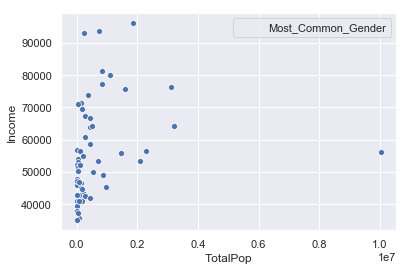

In [66]:
x="TotalPop"
y="Income"
z="Most_Common_Gender"
sns.scatterplot(ca[x],ca[y], hue=ca[z])
plt.show()